# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
import sys
sys.path.append("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy")

weather_api_key = "44d119b80f31cffc34b78f7f03bb5dbd"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meadow lake
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | makokou
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | ewo
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | nurota
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | evanston
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | petrovsk
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,meadow lake,34.8014,-106.5436,295.86,15,49,5.75,US,1715305100
1,puerto natales,-51.7236,-72.4875,271.33,95,63,1.45,CL,1715304990
2,port-aux-francais,-49.3500,70.2167,279.69,91,100,16.70,TF,1715305220
3,keflavik,64.0049,-22.5624,280.39,76,0,5.14,IS,1715304996
4,anadyr,64.7500,177.4833,269.43,68,75,2.00,RU,1715305221


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meadow lake,34.8014,-106.5436,295.86,15,49,5.75,US,1715305100
1,puerto natales,-51.7236,-72.4875,271.33,95,63,1.45,CL,1715304990
2,port-aux-francais,-49.3500,70.2167,279.69,91,100,16.70,TF,1715305220
3,keflavik,64.0049,-22.5624,280.39,76,0,5.14,IS,1715304996
4,anadyr,64.7500,177.4833,269.43,68,75,2.00,RU,1715305221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

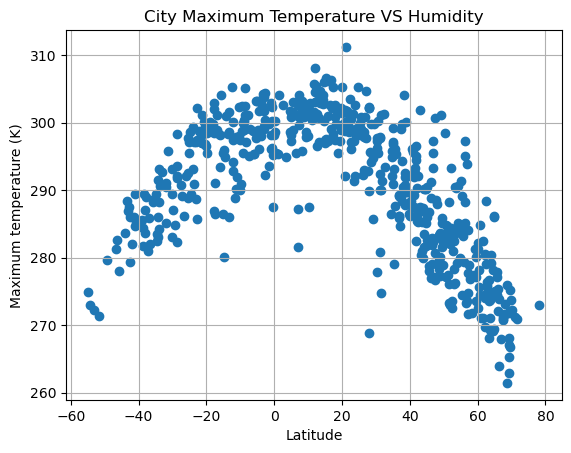

In [10]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature (K)")
plt.title("City Maximum Temperature VS Humidity")
plt.grid()

# Save the figure
plt.savefig("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

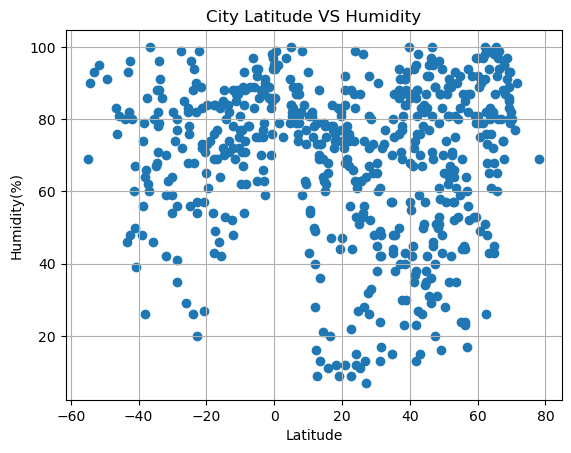

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df["Lat"]
y_values=city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.title("City Latitude VS Humidity")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

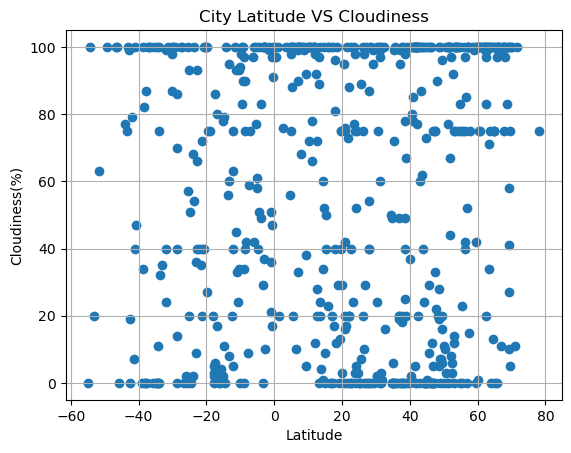

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df["Lat"]
y_values=city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.title("City Latitude VS Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

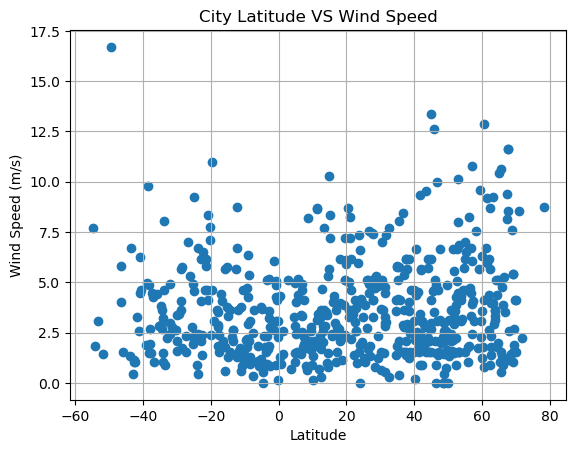

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df["Lat"]
y_values=city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.title("City Latitude VS Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/bohor/Documents/UPENN_BOOTCAMP/python-api-challenge/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meadow lake,34.8014,-106.5436,295.86,15,49,5.75,US,1715305100
3,keflavik,64.0049,-22.5624,280.39,76,0,5.14,IS,1715304996
4,anadyr,64.7500,177.4833,269.43,68,75,2.00,RU,1715305221
5,udachny,66.4167,112.4000,263.95,94,100,5.28,RU,1715305044
6,albany,42.6001,-73.9662,287.41,59,100,1.83,US,1715305098


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,271.33,95,63,1.45,CL,1715304990
2,port-aux-francais,-49.3500,70.2167,279.69,91,100,16.70,TF,1715305220
7,codrington,-38.2667,141.9667,289.49,79,82,4.85,AU,1715305222
8,grytviken,-54.2811,-36.5092,272.94,90,100,1.85,GS,1715304963
12,ewo,-0.8725,14.8206,298.11,83,21,0.90,CG,1715305226


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8475299536688008
The r-squared is: 0.7183070223658397


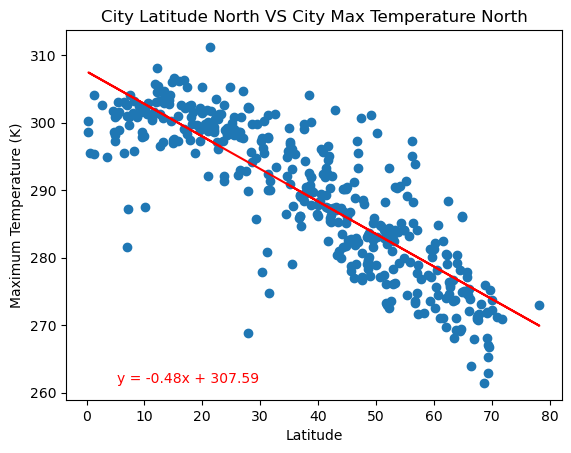

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min() + 5, y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (K)')
plt.title('City Latitude North VS City Max Temperature North')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.7771350168307544
The r-squared is: 0.6039388343845369


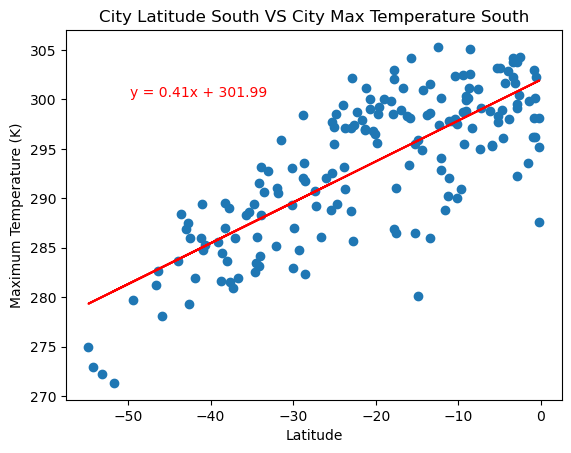

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min() + 5, y_values.max()-5), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (K)')
plt.title('City Latitude South VS City Max Temperature South')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

We can see and prove how the Temperature is higher in the Ecuator, as its values go up the closer it gets to zero. In the same order of ideas we see how the temperature is colder on the poles, and how there is an explicit relation between these two variables.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10178236256870456
The r-squared is: 0.01035964933006723


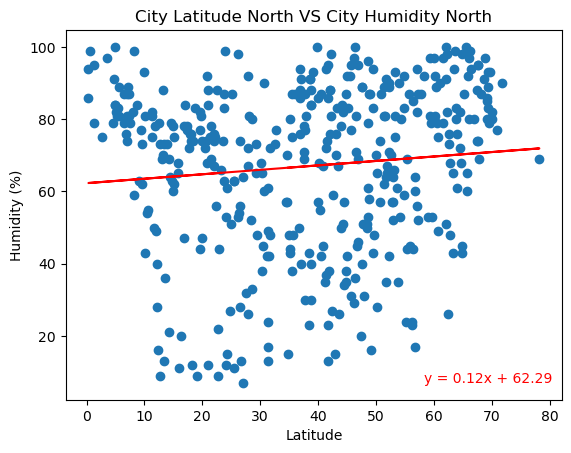

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.max() -20 , y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude North VS City Humidity North')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.17810264050752422
The r-squared is: 0.03172055055575241


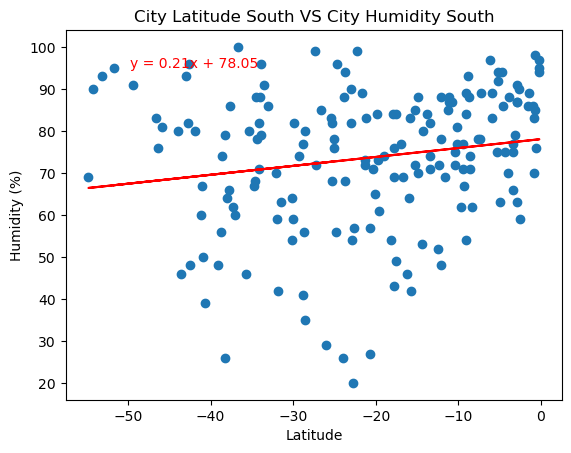

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min() + 5, y_values.max()-5), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude South VS City Humidity South')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

We do not really see a strong relationship between Latitude and Humidity. This is due to the fact that even when the Latitude can influence the Humidity it is not a significant variable for it. The Ecuator, indeed, tends to be generally more humid as its shown in the graph because of the direct sunlight it receives. However, other factors such as proximity to large bodies of water, prevailing winds, altitude, and local geography can also significantly influence humidity levels, sometimes even overriding the effects of latitude. As an example, coastal areas at different will have high humidity due to the sea water.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06268539940731749
The r-squared is: 0.00392945929885492


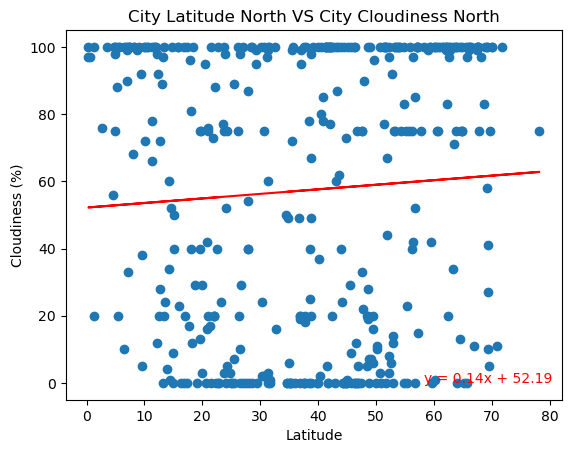

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.max() -20 , y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude North VS City Cloudiness North')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.08652726248532312
The r-squared is: 0.0074869671532040065


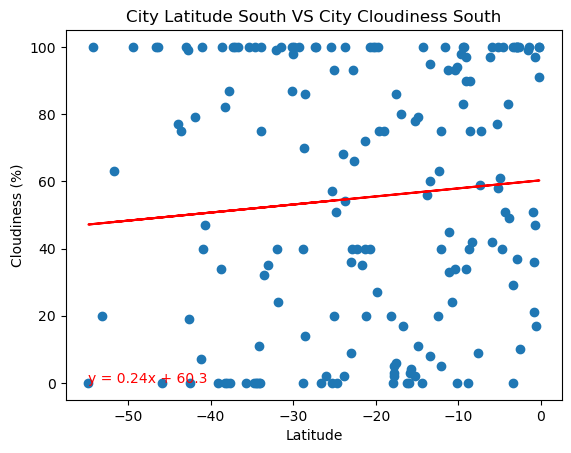

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude South VS City Cloudiness South')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Similar to Humidity, Cloudiness is influenced by Latitude but not as much as other variables. This study could go further by experimenting and comparing other variables. I am sure that if we plotted Humidity and Cloudiness the relationship would be more appreciated as areas with high water contain will tend to have more clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15115659710186194
The r-squared is: 0.022848316847414618


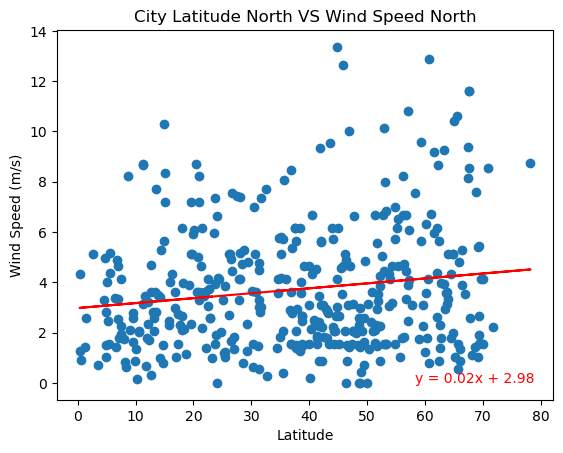

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.max() -20 , y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude North VS Wind Speed North')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-value is: -0.18186744665485272
The r-squared is: 0.033075768152755695


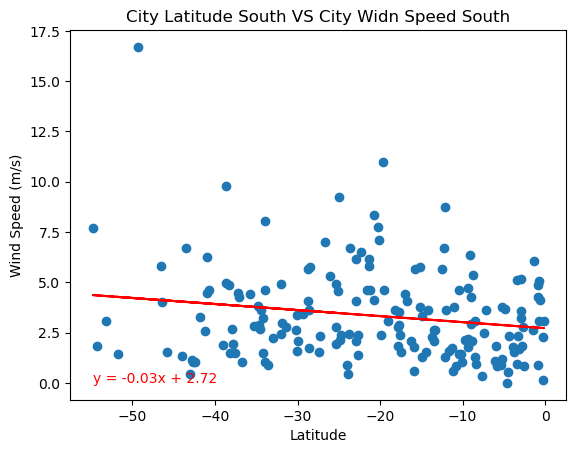

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude South VS City Widn Speed South')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Same situation as before, Latitude influences but the wind has its own science with the Coriolis effect and the atmospheric circulation Hadley Cell. It will also be influenced by the prescence of mountains in the area, the humidity, cloudiness and temperature as well.